In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load Fashion-MNIST dataset downloaded from Kaggle.com
train = pd.read_csv("./data/fashion-mnist_train.zip") # 60,000 labeled training examples
test = pd.read_csv("./data/fashion-mnist_test.zip") #10,000 labeled test examples

In [12]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [14]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [16]:
# Show 16 random 28x28 sample images from dataset
def display_image_sample(df):
    fig,ax = plt.subplots(4,4)
    df = df.sample(16)
    k = 0
    
    for i in range(4):
        for j in range(4):
            ax[i][j].imshow(( np.array( df.iloc[k] ).reshape(28,28) ))
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
            k+=1

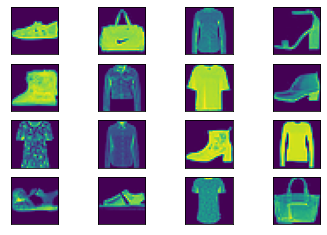

In [17]:
display_image_sample(train.drop('label',axis=1))

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [19]:
# Train Multi-Layer Perceptron Classifier on fraction of training data and tune hyperparameters
def mlp_model(train,test,sample_size,grid_params):
    train = train.sample(sample_size)
    
    X_train, y_train = train.drop('label',axis=1), train['label']
    X_test, y_test = test.drop('label',axis=1), test['label']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mlp_grid = GridSearchCV(MLPClassifier(max_iter=5000),grid_params,refit=True,verbose=2,cv=2,n_jobs=-1)
    mlp_grid.fit(X_train,y_train)
    
    y_pred = mlp_grid.predict(X_test)
    
    return accuracy_score(y_test,y_pred), classification_report(y_test,y_pred), confusion_matrix(y_test,y_pred)

In [20]:
# Tuning size of hidden layers, alpha
mlp_grid_params = {'hidden_layer_sizes':[(450,30),(400,40),(350,50)], 'alpha':[.001,.01,.05,.1]}

In [21]:
# Using 1000 / 60000 examples for training
mlp = mlp_model(train,test,1000,mlp_grid_params)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [ ]:
for i in range(3):
    print(mlp[i])

0.7974
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1000
           1       0.95      0.94      0.95      1000
           2       0.71      0.64      0.68      1000
           3       0.89      0.77      0.83      1000
           4       0.70      0.74      0.72      1000
           5       0.86      0.84      0.85      1000
           6       0.53      0.58      0.55      1000
           7       0.84      0.85      0.85      1000
           8       0.94      0.89      0.92      1000
           9       0.88      0.91      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

[[797   1  27  25   6   4 124   1  14   1]
 [  7 941  19   9   6   0  18   0   0   0]
 [ 17   0 641   4 164   2 161   0  11   0]
 [ 89  37  21 773  45   0  32   0   3   0]
 [  2   2  79  29 745   1 137   0   5   0]
 [  3   0   3   4  

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Train SVC Classifier on fraction of training data and tune hyperparameters
def svc_model(train,test,sample_size,grid_params):
    train = train.sample(sample_size)
    
    X_train, y_train = train.drop('label',axis=1), train['label']
    X_test, y_test = test.drop('label',axis=1), test['label']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    svc_grid = GridSearchCV(SVC(max_iter=5000),grid_params,refit=True,verbose=2,cv=2,n_jobs=-1)
    svc_grid.fit(X_train,y_train)
    
    y_pred = svc_grid.predict(X_test)
    
    return accuracy_score(y_test,y_pred), classification_report(y_test,y_pred), confusion_matrix(y_test,y_pred)

In [ ]:
# Tuning C, gamma
svc_grid_params = {'C':[0.1,1, 10, 100], 'gamma':[1,0.1,0.01,0.001]} 

In [ ]:
# Using 1000 / 60000 examples for training
svc = svc_model(train,test,1000,svc_grid_params)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


In [ ]:
for i in range(3):
    print(svc[i])

0.815
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1000
           1       0.99      0.93      0.96      1000
           2       0.68      0.74      0.71      1000
           3       0.89      0.83      0.86      1000
           4       0.75      0.74      0.74      1000
           5       0.89      0.89      0.89      1000
           6       0.60      0.55      0.57      1000
           7       0.88      0.86      0.87      1000
           8       0.87      0.94      0.90      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.81      0.81     10000

[[765   2  21  31   6   3 145   0  25   2]
 [  4 933  13  24   2   0  20   0   4   0]
 [ 27   0 742   5 106   1 100   0  19   0]
 [ 64  10  16 832  35   0  39   0   4   0]
 [  3   0 170  23 738   0  56   0  10   0]
 [  3   0   1   0   

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train KNN Classifier on fraction of training data and tune hyperparameters
def knn_model(train,test,sample_size,grid_params):
    train = train.sample(sample_size)
    
    X_train, y_train = train.drop('label',axis=1), train['label']
    X_test, y_test = test.drop('label',axis=1), test['label']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn_grid = GridSearchCV(KNeighborsClassifier(),grid_params,refit=True,verbose=2,cv=2,n_jobs=-1)
    knn_grid.fit(X_train,y_train)
    
    y_pred = knn_grid.predict(X_test)
    
    return accuracy_score(y_test,y_pred), classification_report(y_test,y_pred), confusion_matrix(y_test,y_pred)

In [ ]:
# Tuning number of neighbors
knn_grid_params = {'n_neighbors':[1,3,5,7,9,11]}

In [ ]:
# Using 1000 / 60000 for training
knn = knn_model(train,test,1000,knn_grid_params)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [ ]:
for i in range(3):
    print(knn[i])

0.7551
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.97      0.94      0.95      1000
           2       0.59      0.66      0.62      1000
           3       0.75      0.86      0.80      1000
           4       0.61      0.62      0.62      1000
           5       0.95      0.72      0.82      1000
           6       0.49      0.42      0.45      1000
           7       0.78      0.86      0.82      1000
           8       0.97      0.80      0.88      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000

[[757   2  46  77  18   0  93   1   5   1]
 [ 10 941  14  24   4   0   7   0   0   0]
 [ 27   0 659   8 179   0 120   0   6   1]
 [ 47  20  18 857  25   0  32   0   1   0]
 [  7   4 163 101 617   0 107   0   1   0]
 [  5   0  19   2  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train Decision Tree Classifier on fraction of training data
def dtc_model(train,test,sample_size):
    train = train.sample(sample_size)
    
    X_train, y_train = train.drop('label',axis=1), train['label']
    X_test, y_test = test.drop('label',axis=1), test['label']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train,y_train)
    
    y_pred = dtc.predict(X_test)
    
    return accuracy_score(y_test,y_pred), classification_report(y_test,y_pred), confusion_matrix(y_test,y_pred)

In [ ]:
# Using 1000 / 60000 examples for training
dtc = dtc_model(train,test,1000)

In [ ]:
for i in range(2):
    print(dtc[i])

0.6828
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      1000
           1       0.88      0.92      0.90      1000
           2       0.54      0.57      0.55      1000
           3       0.64      0.68      0.66      1000
           4       0.61      0.55      0.58      1000
           5       0.73      0.73      0.73      1000
           6       0.46      0.46      0.46      1000
           7       0.71      0.74      0.73      1000
           8       0.76      0.75      0.76      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train Random Forest Classifier on fraction of training data and tune hyperparameters
def rfc_model(train,test,sample_size,grid_params):
    train = train.sample(sample_size)
    
    X_train, y_train = train.drop('label',axis=1), train['label']
    X_test, y_test = test.drop('label',axis=1), test['label']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    rfc_grid = GridSearchCV(RandomForestClassifier(),grid_params,refit=True,verbose=2,cv=2,n_jobs=-1)
    rfc_grid.fit(X_train,y_train)
    
    y_pred = rfc_grid.predict(X_test)
    
    return accuracy_score(y_test,y_pred), classification_report(y_test,y_pred), confusion_matrix(y_test,y_pred)

In [ ]:
# Tuning number of estimators
rfc_grid_params = {'n_estimators':[100,200,300,400,500]}

In [ ]:
# Using 1000 / 60000 examples for training
rfc = rfc_model(train,test,1000,rfc_grid_params)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
for i in range(3):
    print(rfc[i])

0.809
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.96      0.92      0.94      1000
           2       0.68      0.75      0.71      1000
           3       0.79      0.89      0.84      1000
           4       0.74      0.75      0.74      1000
           5       0.89      0.87      0.88      1000
           6       0.63      0.41      0.50      1000
           7       0.86      0.85      0.85      1000
           8       0.89      0.95      0.92      1000
           9       0.88      0.91      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000

[[787   8  36  79   0   6  49   1  34   0]
 [  3 920  19  51   1   1   4   0   1   0]
 [  9   2 746   8 147   3  67   0  18   0]
 [ 21  26  24 894  17   1  15   0   2   0]
 [  2   3 104  47 746   1  92   0   5   0]
 [  0   0   0   2   

In [ ]:
# SVC classifier most accurate and has best F1 score compared to all others with training sample = 1000
# SVC also computationally faster than MLP classifier
# K-Nearest Neighbors, Decision Tree, and Random Forest classifiers compute very quickly
# Biggest struggle for all classifiers is distinguishing between 0 (T-shirt) and 6 (shirt)